# Case 2: Predicting Student Success in Online Courses

## Data Generation: 
 - Simulate a dataset with relevant features like student profile, engagement data, and historical data.

In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Student Profile Data
student_ids = np.arange(1, 1001)  # 1000 students
ages = np.random.randint(18, 25, size=1000)
genders = np.random.choice(['Male', 'Female'], size=1000)
majors = np.random.choice(['Computer Science', 'Mechanical Engineering', 'Civil Engineering', 'Electrical Engineering', 'Environmental Science'], size=1000)
years = np.random.choice([1, 2, 3, 4], size=1000)
regions = np.random.choice(['West Bengal', 'Delhi', 'Karnataka', 'Maharashtra', 'Uttar Pradesh'], size=1000)

# Engagement Data
logins_per_week = np.random.randint(1, 10, size=1000)
videos_watched = np.random.randint(1, 20, size=1000)
time_spent_on_platform = np.random.randint(1, 20, size=1000)  # in hours per week
avg_quiz_score = np.random.randint(50, 100, size=1000)  # quiz scores during the course

# Historical Data
courses_completed = np.random.randint(0, 5, size=1000)
courses_started = np.random.randint(1, 6, size=1000)
avg_score_across_courses = np.random.randint(50, 100, size=1000)

# Target: Whether the student completed the course (binary classification)
completed_course = np.random.choice([0, 1], size=1000, p=[0.3, 0.7])  # 1 = completed, 0 = dropped out

# Create DataFrame
students_df = pd.DataFrame({
    'student_id': student_ids,
    'age': ages,
    'gender': genders,
    'major': majors,
    'year': years,
    'region': regions,
    'logins_per_week': logins_per_week,
    'videos_watched': videos_watched,
    'time_spent_on_platform': time_spent_on_platform,
    'avg_quiz_score': avg_quiz_score,
    'courses_completed': courses_completed,
    'courses_started': courses_started,
    'avg_score_across_courses': avg_score_across_courses,
    'completed_course': completed_course
})

print(students_df.head())  # View the first few rows

   student_id  age  gender                  major  year         region  \
0           1   24    Male       Computer Science     1  Uttar Pradesh   
1           2   21  Female  Environmental Science     1          Delhi   
2           3   22    Male       Computer Science     2  Uttar Pradesh   
3           4   24    Male       Computer Science     1      Karnataka   
4           5   20    Male       Computer Science     2          Delhi   

   logins_per_week  videos_watched  time_spent_on_platform  avg_quiz_score  \
0                2              10                       3              98   
1                6              17                       2              82   
2                3               2                       1              85   
3                4              17                      10              85   
4                8              16                      19              67   

   courses_completed  courses_started  avg_score_across_courses  \
0                  

## Data Preprocessing: 
 - Clean and prepare the data for modeling.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label Encoding for categorical features
le_gender = LabelEncoder()
students_df['gender'] = le_gender.fit_transform(students_df['gender'])

le_major = LabelEncoder()
students_df['major'] = le_major.fit_transform(students_df['major'])

le_region = LabelEncoder()
students_df['region'] = le_region.fit_transform(students_df['region'])

# Separate features (X) and target (y)
X = students_df.drop(columns=['student_id', 'completed_course'])  # Drop student_id and target
y = students_df['completed_course']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building:
 - Now, we’ll build a classification model using a machine learning algorithm like Logistic Regression, Random Forest, or XGBoost to predict whether a student will complete or drop out of the course.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6850
Precision: 0.6995
Recall: 0.9643
F1 Score: 0.8108


The results from our model show a relatively strong recall of 0.9643 and a decent F1 score of 0.8108, meaning the model is quite good at identifying students who will complete the course (recall). However, the accuracy of 0.685 and precision of 0.6995 could be improved, which suggests that some predicted completions are incorrect (false positives).

## Feature Importance:
 - To understand which features are the most important in predicting student success, we can analyze the feature importance from the Random Forest model.

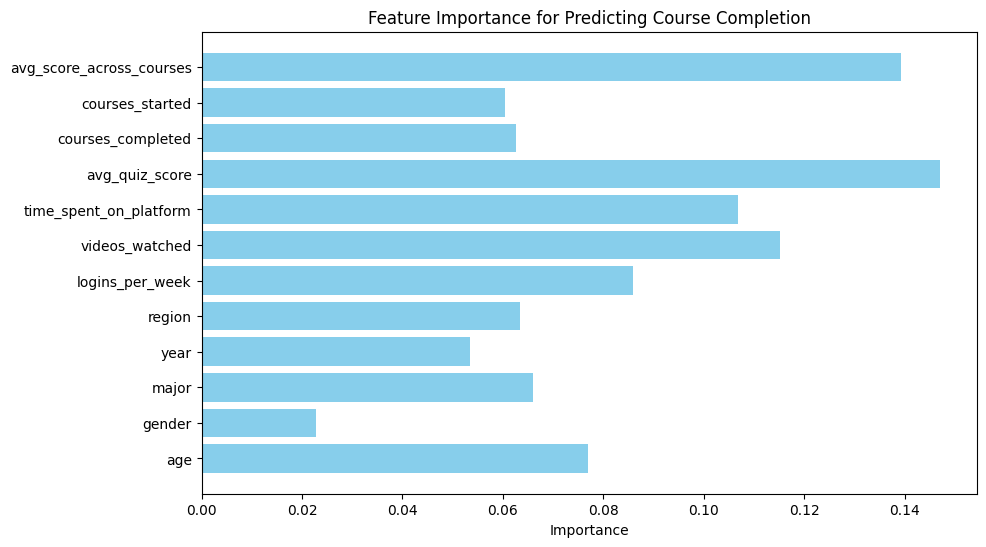

In [4]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Course Completion')
plt.show()

Feature Importance Observations: 
 - avg_score_across_courses and avg_quiz_score are among the most important features. This suggests that students who tend to perform better in quizzes and previous courses are more likely to complete the current course.
 - time_spent_on_platform is also highly influential, indicating that students who spend more time engaged with the platform have a higher likelihood of completion.
 - Engagement features like logins_per_week and videos_watched are moderately important, showing that the more a student engages, the higher their likelihood of completion.
 - Demographic features like age, gender, and region are less important, suggesting that engagement and performance data are stronger predictors of success.

In [5]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")

XGBoost Accuracy: 0.6400
XGBoost Precision: 0.6954
XGBoost Recall: 0.8643
XGBoost F1 Score: 0.7707


## Hyperparameter Tuning for Random Forest
 - We’ll tune the Random Forest model's hyperparameters using GridSearchCV to optimize performance.

In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and evaluation
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the optimized Random Forest model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_best_rf)
precision_rf_tuned = precision_score(y_test, y_pred_best_rf)
recall_rf_tuned = recall_score(y_test, y_pred_best_rf)
f1_rf_tuned = f1_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Tuned Random Forest Precision: {precision_rf_tuned:.4f}")
print(f"Tuned Random Forest Recall: {recall_rf_tuned:.4f}")
print(f"Tuned Random Forest F1 Score: {f1_rf_tuned:.4f}")
print(f"Best Parameters: {grid_search_rf.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tuned Random Forest Accuracy: 0.7050
Tuned Random Forest Precision: 0.7035
Tuned Random Forest Recall: 1.0000
Tuned Random Forest F1 Score: 0.8260
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [7]:
# Best parameters obtained from GridSearchCV
best_rf_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(
    max_depth=best_rf_params['max_depth'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    min_samples_split=best_rf_params['min_samples_split'],
    n_estimators=best_rf_params['n_estimators'],
    random_state=42
)

best_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_best_rf)
precision_rf_tuned = precision_score(y_test, y_pred_best_rf)
recall_rf_tuned = recall_score(y_test, y_pred_best_rf)
f1_rf_tuned = f1_score(y_test, y_pred_best_rf)

# Display the metrics
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned:.4f}")
print(f"Tuned Random Forest Precision: {precision_rf_tuned:.4f}")
print(f"Tuned Random Forest Recall: {recall_rf_tuned:.4f}")
print(f"Tuned Random Forest F1 Score: {f1_rf_tuned:.4f}")

Tuned Random Forest Accuracy: 0.7050
Tuned Random Forest Precision: 0.7035
Tuned Random Forest Recall: 1.0000
Tuned Random Forest F1 Score: 0.8260


What These Metrics Tell Us:
- High Recall (100%) means the model is excellent at identifying students who will complete the course, and it is not missing any actual completions.
- Lower Precision (70.35%) indicates that while the model is good at finding students who will complete the course, it tends to overestimate how many students will complete (i.e., there are some false positives, where it predicts a completion but the student actually drops out).
- Accuracy (70.5%) shows that the model is correct a little over 70% of the time, but since we have 100% recall, it’s likely that some of these accurate predictions are due to the correct identification of students who dropped out.
- The F1 score (82.60%) shows a good balance between precision and recall, meaning the model is effective but could benefit from improvements to precision.

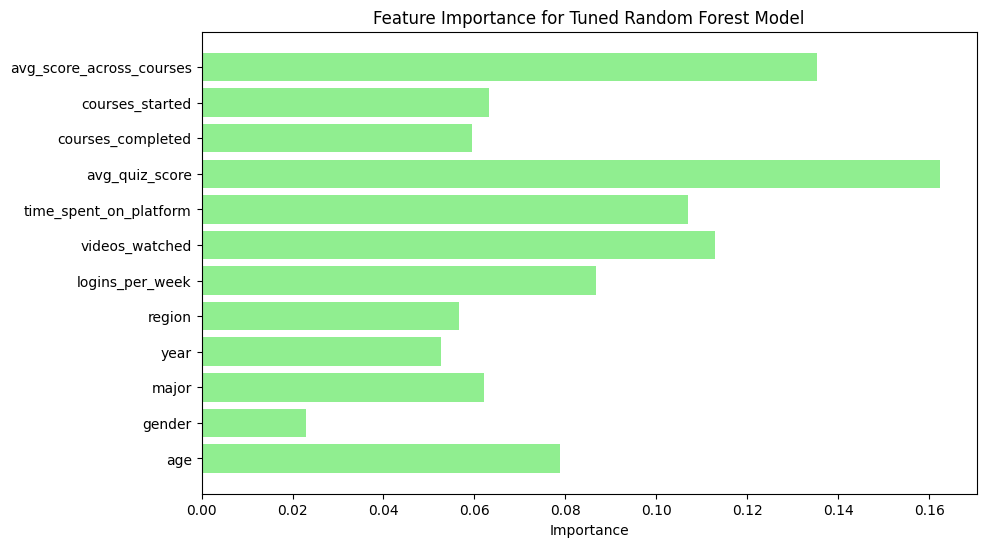

In [8]:
# Plot feature importance for the tuned Random Forest model
import matplotlib.pyplot as plt

feature_importances_tuned_rf = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_tuned_rf, color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance for Tuned Random Forest Model')
plt.show()